In [85]:
import numpy as np
import matplotlib.pyplot as plt
import random

#Def the game
def hat_game(n):
    hat = list(range(1, n + 1))
    while len(hat) > 1:
        a, b = random.sample(hat, 2)
        hat.remove(a)
        hat.remove(b)
        diff = abs(a - b)
        hat.append(diff)

    return hat[0]

#Examples
for n in range(5):
    print(f"final number: {hat_game(5)}")
    n+=1


final number: 3
final number: 1
final number: 1
final number: 1
final number: 3


In [86]:
#Examples
for n in range(5):
    print(f"final number: {hat_game(6)}")
    n+=1

final number: 3
final number: 1
final number: 5
final number: 3
final number: 3


In [87]:
#Examples
for n in range(5):
    print(f"final number: {hat_game(7)}")
    n+=1

final number: 2
final number: 4
final number: 2
final number: 4
final number: 2


In [88]:
#Examples
for n in range(5):
    print(f"final number: {hat_game(2025)}")
    n+=1

final number: 41
final number: 17
final number: 137
final number: 369
final number: 511


In [89]:
#Prints out each step
def hat_game_print(n):
    hat = list(range(1, n + 1))
    print(hat)

    while len(hat) > 1:
      a, b = random.sample(hat, 2)
      hat.remove(a)
      hat.remove(b)
      diff = abs(a - b)
      hat.append(diff)
      print(hat)
    return hat[0]

#Examles
for n in range(5):
    hat_game_print(5)
    print()
    n+=1

[1, 2, 3, 4, 5]
[3, 4, 5, 1]
[5, 1, 1]
[1, 4]
[3]

[1, 2, 3, 4, 5]
[2, 3, 4, 4]
[2, 3, 0]
[3, 2]
[1]

[1, 2, 3, 4, 5]
[1, 3, 5, 2]
[5, 2, 2]
[2, 3]
[1]

[1, 2, 3, 4, 5]
[2, 4, 5, 2]
[5, 2, 2]
[2, 3]
[1]

[1, 2, 3, 4, 5]
[1, 3, 4, 3]
[3, 3, 3]
[3, 0]
[3]



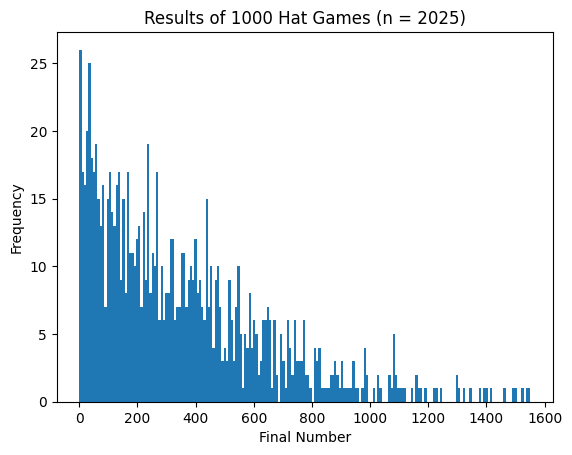

In [6]:
#Run the game 1000 times
results = [hat_game(2025) for _ in range(1000)]

#Plot results
plt.hist(results, bins=200)
plt.title('Results of 1000 Hat Games (n = 2025)')
plt.xlabel('Final Number')
plt.ylabel('Frequency')
plt.show()

In [90]:
from scipy.optimize import fsolve

#Get histogram data
freq, edges = np.histogram(results, bins=200)
value = (edges[:-1] + edges[1:]) / 2

#Approximate probs
probs = freq/1000

#Def the equation to be solved
def equation(lmbda, x, P_x):
    return (lmbda)*np.exp(-lmbda * x) - (P_x)

#Find roots of eq
def lambda_guesses(x, P_x):
    guess = 0.5
    solution = fsolve(equation, guess, args=(x, P_x))[0]
    return solution

lambdas = []

for i in range(1,200):
  lambdas.append(lambda_guesses(value[i], probs[i]))

final_lambda = np.mean(lambdas)
print(final_lambda)





0.522025078240276


<ipython-input-90-76133a80f4f3>:12: RuntimeWarning: overflow encountered in exp
  return (lmbda)*np.exp(-lmbda * x) - (P_x)
<ipython-input-90-76133a80f4f3>:17: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solution = fsolve(equation, guess, args=(x, P_x))[0]
<ipython-input-90-76133a80f4f3>:17: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  solution = fsolve(equation, guess, args=(x, P_x))[0]


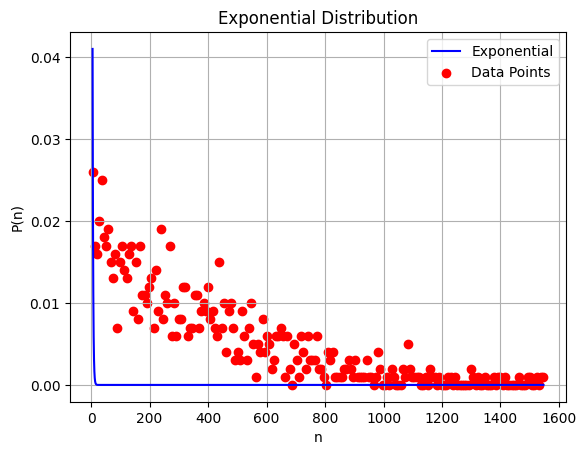

In [75]:
#Calculate and Plot the exponential dist
n_vals = np.linspace(value[0],value[-1],5000)
Probs = final_lambda*np.exp(-final_lambda*n_vals)


plt.plot((n_vals), (Probs), label=r'Exponential', color='b')
plt.scatter((value),(probs), color='r', label='Data Points')
plt.title(f"Exponential Distribution")
plt.xlabel('n')
plt.ylabel('P(n)')
plt.legend()
plt.grid(True)
plt.show()

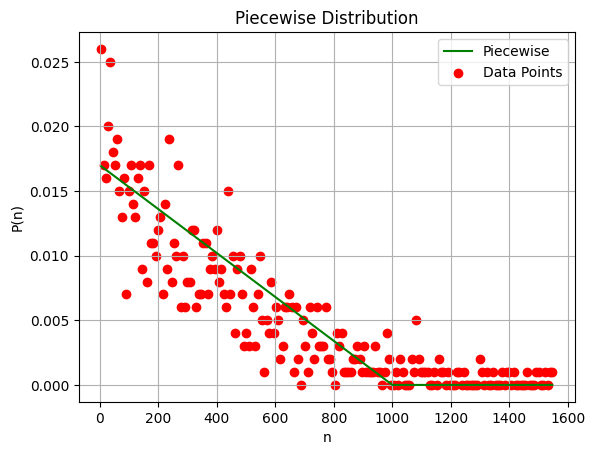

In [91]:
#Calculate and plot piecewise dist
def piecewise(n):
  return np.where(n < 1000, (-17/1000000)*n + 0.017, final_lambda*np.exp(-final_lambda*n))


p_vals = piecewise(n_vals)

plt.plot((n_vals), (piecewise(n_vals)), label=r'Piecewise', color='g')
plt.scatter((value),(probs), color='r', label='Data Points')

plt.title(f"Piecewise Distribution")
plt.xlabel('n')
plt.ylabel('P(n)')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
#Review phase testing
final_vals = [hat_game(2025) for _ in range(1000)]

for n in final_vals:
    if n % 2 == 0:
      print("Even number found!")
print("testing over")


testing over


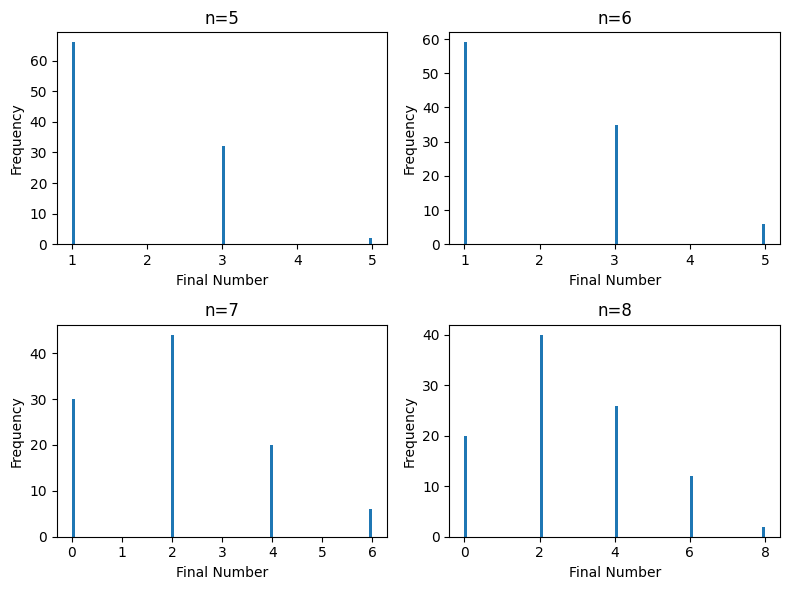

In [93]:
# Run the game 100 times for n=1,2,3,4
res_5= [hat_game(5) for _ in range(100)]
res_6 = [hat_game(6) for _ in range(100)]
res_7 = [hat_game(7) for _ in range(100)]
res_8 = [hat_game(8) for _ in range(100)]


#Plotting
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes[0, 0].hist(res_5, bins=100)
axes[0, 0].set_title('n=5')
axes[0, 0].set_xlabel('Final Number')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(res_6, bins=100)
axes[0, 1].set_title('n=6')
axes[0, 1].set_xlabel('Final Number')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(res_7, bins=100)
axes[1, 0].set_title('n=7')
axes[1, 0].set_xlabel('Final Number')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(res_8, bins=100)
axes[1, 1].set_title('n=8')
axes[1, 1].set_xlabel('Final Number')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()